In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/pistachio-types-detection/pistachio.csv


In [2]:
df=pd.read_csv('/kaggle/input/pistachio-types-detection/pistachio.csv')

In [3]:
df.head()

,AREA,PERIMETER,MAJOR_AXIS,MINOR_AXIS,ECCENTRICITY,EQDIASQ,SOLIDITY,CONVEX_AREA,EXTENT,ASPECT_RATIO,ROUNDNESS,COMPACTNESS,SHAPEFACTOR_1,SHAPEFACTOR_2,SHAPEFACTOR_3,SHAPEFACTOR_4,Class
0,73107,1161.8070,442.4074,217.7261,0.8705,305.0946,0.9424,77579,0.7710,2.0319,0.6806,0.6896,0.0061,0.0030,0.4756,0.9664,Kirmizi_Pistachio
1,89272,1173.1810,460.2551,251.9546,0.8369,337.1419,0.9641,92598,0.7584,1.8267,0.8151,0.7325,0.0052,0.0028,0.5366,0.9802,Siit_Pistachio
2,60955,999.7890,386.9247,209.1255,0.8414,278.5863,0.9465,64400,0.7263,1.8502,0.7663,0.7200,0.0063,0.0034,0.5184,0.9591,Kirmizi_Pistachio
3,79537,1439.5129,466.7973,221.2136,0.8806,318.2289,0.9437,84281,0.7568,2.1102,0.4823,0.6817,0.0059,0.0028,0.4648,0.9807,Kirmizi_Pistachio
4,96395,1352.6740,515.8730,246.5945,0.8784,350.3340,0.9549,100950,0.7428,2.0920,0.6620,0.6791,0.0054,0.0026,0.4612,0.9648,Kirmizi_Pistachio


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1718 entries, 0 to 1717
Data columns (total 17 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   AREA           1718 non-null   int64  
 1   PERIMETER      1718 non-null   float64
 2   MAJOR_AXIS     1718 non-null   float64
 3   MINOR_AXIS     1718 non-null   float64
 4   ECCENTRICITY   1718 non-null   float64
 5   EQDIASQ        1718 non-null   float64
 6   SOLIDITY       1718 non-null   float64
 7   CONVEX_AREA    1718 non-null   int64  
 8   EXTENT         1718 non-null   float64
 9   ASPECT_RATIO   1718 non-null   float64
 10  ROUNDNESS      1718 non-null   float64
 11  COMPACTNESS    1718 non-null   float64
 12  SHAPEFACTOR_1  1718 non-null   float64
 13  SHAPEFACTOR_2  1718 non-null   float64
 14  SHAPEFACTOR_3  1718 non-null   float64
 15  SHAPEFACTOR_4  1718 non-null   float64
 16  Class          1718 non-null   object 
dtypes: float64(14), int64(2), object(1)
memory usage: 22

In [5]:
df.describe()

,AREA,PERIMETER,MAJOR_AXIS,MINOR_AXIS,ECCENTRICITY,EQDIASQ,SOLIDITY,CONVEX_AREA,EXTENT,ASPECT_RATIO,ROUNDNESS,COMPACTNESS,SHAPEFACTOR_1,SHAPEFACTOR_2,SHAPEFACTOR_3,SHAPEFACTOR_4
count,1718.000000,1718.000000,1718.000000,1718.000000,1718.000000,1718.000000,1718.000000,1718.000000,1718.000000,1718.000000,1718.000000,1718.000000,1718.000000,1718.000000,1718.000000,1718.000000
mean,79871.952852,1421.797588,446.206444,238.193128,0.840347,317.790000,0.940103,84947.671129,0.716055,1.899342,0.570831,0.712841,0.005704,0.003017,0.510097,0.955185
std,12968.217051,373.408835,31.885328,30.426445,0.049026,26.571699,0.050006,13081.742551,0.052534,0.241253,0.211514,0.044230,0.000810,0.000334,0.063391,0.051735
min,29808.000000,858.363000,321.425500,133.509600,0.504900,194.814600,0.588000,37935.000000,0.427200,1.158500,0.062800,0.476000,0.004000,0.002400,0.226600,0.620400
25%,71898.500000,1169.633225,426.554100,217.875475,0.817500,302.562375,0.920250,76357.750000,0.688100,1.736325,0.372325,0.682000,0.005200,0.002800,0.465125,0.944200
50%,79795.000000,1260.785500,448.453150,235.888750,0.850250,318.744650,0.953800,84973.000000,0.726100,1.899550,0.643850,0.709750,0.005600,0.003000,0.503750,0.972800
75%,88980.000000,1599.479000,467.515200,257.433625,0.875375,336.590000,0.976300,93660.750000,0.753600,2.068575,0.744450,0.741600,0.006100,0.003200,0.549975,0.986800
max,124008.000000,2755.049100,535.642200,383.046100,0.946000,397.356100,0.995100,132478.000000,0.820400,3.085800,0.933600,0.869500,0.013100,0.005300,0.756100,0.999000


In [6]:
df.corr()

/tmp/ipykernel_20/1134722465.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,AREA,PERIMETER,MAJOR_AXIS,MINOR_AXIS,ECCENTRICITY,EQDIASQ,SOLIDITY,CONVEX_AREA,EXTENT,ASPECT_RATIO,ROUNDNESS,COMPACTNESS,SHAPEFACTOR_1,SHAPEFACTOR_2,SHAPEFACTOR_3,SHAPEFACTOR_4
AREA,1.000000,0.126761,0.692633,0.793049,-0.363923,0.997478,0.346586,0.942436,0.326084,-0.435502,0.242496,0.557839,-0.891779,-0.636923,0.551963,0.277317
PERIMETER,0.126761,1.000000,0.098464,0.401052,-0.346744,0.124297,-0.669458,0.374869,-0.403156,-0.318336,-0.890968,0.055165,-0.091886,0.282257,0.058340,-0.630312
MAJOR_AXIS,0.692633,0.098464,1.000000,0.266077,0.293661,0.700013,0.236725,0.654807,0.182139,0.257291,0.146419,-0.201616,-0.381704,-0.788998,-0.208792,0.190569
MINOR_AXIS,0.793049,0.401052,0.266077,1.000000,-0.823695,0.790715,-0.111769,0.891061,0.037579,-0.845653,-0.073826,0.774499,-0.849903,-0.060274,0.773085,-0.210922
ECCENTRICITY,-0.363923,-0.346744,0.293661,-0.823695,1.000000,-0.357936,0.281819,-0.495013,0.092749,0.942441,0.177180,-0.839929,0.584090,-0.415222,-0.847845,0.355280
EQDIASQ,0.997478,0.124297,0.700013,0.790715,-0.357936,1.000000,0.354292,0.939496,0.333053,-0.435847,0.246490,0.556026,-0.905827,-0.648537,0.548476,0.281246
SOLIDITY,0.346586,-0.669458,0.236725,-0.111769,0.281819,0.354292,1.000000,0.019002,0.672702,0.188912,0.773828,0.211119,-0.358126,-0.726551,0.201128,0.948979
CONVEX_AREA,0.942436,0.374869,0.654807,0.891061,-0.495013,0.939496,0.019002,1.000000,0.115222,-0.536391,-0.015658,0.523205,-0.834294,-0.423927,0.519330,-0.042424
EXTENT,0.326084,-0.403156,0.182139,0.037579,0.092749,0.333053,0.672702,0.115222,1.000000,0.024325,0.515366,0.246722,-0.357668,-0.505440,0.238224,0.641970
ASPECT_RATIO,-0.435502,-0.318336,0.257291,-0.845653,0.942441,-0.435847,0.188912,-0.536391,0.024325,1.000000,0.113843,-0.898520,0.691707,-0.323127,-0.893924,0.265343


In [7]:
df['Class']

0       Kirmizi_Pistachio
1          Siit_Pistachio
2       Kirmizi_Pistachio
3       Kirmizi_Pistachio
4       Kirmizi_Pistachio
              ...        
1713    Kirmizi_Pistachio
1714    Kirmizi_Pistachio
1715       Siit_Pistachio
1716    Kirmizi_Pistachio
1717       Siit_Pistachio
Name: Class, Length: 1718, dtype: object

In [8]:
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [9]:
X=df.iloc[:,:-1]
y=df.iloc[:,-1]
#X_train,X_test,y_train,y_test=train_test_split(,test_size=0.3,random_state=42)

In [10]:
X

,AREA,PERIMETER,MAJOR_AXIS,MINOR_AXIS,ECCENTRICITY,EQDIASQ,SOLIDITY,CONVEX_AREA,EXTENT,ASPECT_RATIO,ROUNDNESS,COMPACTNESS,SHAPEFACTOR_1,SHAPEFACTOR_2,SHAPEFACTOR_3,SHAPEFACTOR_4
0,73107,1161.8070,442.4074,217.7261,0.8705,305.0946,0.9424,77579,0.7710,2.0319,0.6806,0.6896,0.0061,0.0030,0.4756,0.9664
1,89272,1173.1810,460.2551,251.9546,0.8369,337.1419,0.9641,92598,0.7584,1.8267,0.8151,0.7325,0.0052,0.0028,0.5366,0.9802
2,60955,999.7890,386.9247,209.1255,0.8414,278.5863,0.9465,64400,0.7263,1.8502,0.7663,0.7200,0.0063,0.0034,0.5184,0.9591
3,79537,1439.5129,466.7973,221.2136,0.8806,318.2289,0.9437,84281,0.7568,2.1102,0.4823,0.6817,0.0059,0.0028,0.4648,0.9807
4,96395,1352.6740,515.8730,246.5945,0.8784,350.3340,0.9549,100950,0.7428,2.0920,0.6620,0.6791,0.0054,0.0026,0.4612,0.9648
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1713,65570,2071.4451,418.0258,217.1458,0.8545,288.9400,0.8976,73054,0.5945,1.9251,0.1920,0.6912,0.0064,0.0033,0.4778,0.9197
1714,68849,1441.2590,451.0457,205.2553,0.8905,296.0764,0.9340,73716,0.6459,2.1975,0.4165,0.6564,0.0066,0.0030,0.4309,0.9469
1715,90270,1370.5380,428.9636,269.8232,0.7774,339.0211,0.9722,92847,0.7400,1.5898,0.6039,0.7903,0.0048,0.0030,0.6246,0.9930
1716,73148,1309.8430,469.0491,208.3141,0.8960,305.1801,0.9376,78014,0.6341,2.2516,0.5358,0.6506,0.0064,0.0028,0.4233,0.9532


In [11]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=42)

In [12]:
X_train

,AREA,PERIMETER,MAJOR_AXIS,MINOR_AXIS,ECCENTRICITY,EQDIASQ,SOLIDITY,CONVEX_AREA,EXTENT,ASPECT_RATIO,ROUNDNESS,COMPACTNESS,SHAPEFACTOR_1,SHAPEFACTOR_2,SHAPEFACTOR_3,SHAPEFACTOR_4
715,90627,1157.0380,448.3503,258.7116,0.8167,339.6909,0.9861,91901,0.7904,1.7330,0.8507,0.7576,0.0049,0.0029,0.5740,0.9948
1351,87128,1150.7010,445.1925,252.3783,0.8238,333.0688,0.9912,87901,0.6852,1.7640,0.8269,0.7481,0.0051,0.0029,0.5597,0.9873
879,91032,1171.5200,420.4451,279.7567,0.7465,340.4490,0.9850,92415,0.7263,1.5029,0.8335,0.8097,0.0046,0.0031,0.6557,0.9854
1516,73334,1099.4659,413.7380,227.9584,0.8345,305.5679,0.9716,75478,0.7595,1.8150,0.7623,0.7386,0.0056,0.0031,0.5455,0.9900
327,97686,2266.3850,474.3841,292.3679,0.7875,352.6722,0.8989,108671,0.6967,1.6226,0.2390,0.7434,0.0049,0.0030,0.5527,0.8968
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1130,66146,1116.3879,439.9942,200.2433,0.8904,290.2063,0.9361,70660,0.7105,2.1973,0.6669,0.6596,0.0067,0.0030,0.4350,0.9559
1294,86342,1153.8120,460.5910,239.4560,0.8542,331.5630,0.9907,87153,0.6671,1.9235,0.8150,0.7199,0.0053,0.0028,0.5182,0.9968
860,73198,1166.6580,450.2952,232.6949,0.8561,305.2844,0.8942,81857,0.6921,1.9351,0.6758,0.6780,0.0062,0.0032,0.4596,0.8895
1459,75048,1157.5260,456.0540,211.5963,0.8858,309.1182,0.9836,76301,0.7517,2.1553,0.7039,0.6778,0.0061,0.0028,0.4594,0.9902


In [13]:
scaler=StandardScaler()
scaler.fit(X_train)
X_train_standard=scaler.transform(X_train)

In [14]:
X_train_standard

array([[ 0.81852022, -0.6905782 ,  0.08150696, ..., -0.34307676,
         0.96395068,  0.78743114],
       [ 0.55266166, -0.7084701 , -0.01709819, ..., -0.34307676,
         0.74510525,  0.62944511],
       [ 0.84929265, -0.64968969, -0.78985806, ...,  0.27149592,
         2.21427738,  0.58942198],
       ...,
       [-0.50575781, -0.66341707,  0.14223821, ...,  0.57878226,
        -0.78681277, -1.4306928 ],
       [-0.36519241, -0.68920038,  0.32206193, ..., -0.6503631 ,
        -0.78987355,  0.69053304],
       [ 0.26431264, -0.71897881,  0.37542387, ..., -0.6503631 ,
        -0.07212175,  0.7811117 ]])

In [15]:
scaler=StandardScaler()
scaler.fit(X_test)
X_test_standard=scaler.transform(X_test)

In [16]:
from sklearn.tree import DecisionTreeClassifier

In [17]:
dtree_model=DecisionTreeClassifier(max_depth=2)
dtree_model.fit(X_train_standard,y_train)

DecisionTreeClassifier(max_depth=2)

In [18]:
y_pred=dtree_model.predict(X_test_standard)

In [19]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

In [20]:
cm=confusion_matrix(y_test,y_pred)
cm

array([[270,  25],
       [ 46, 175]])

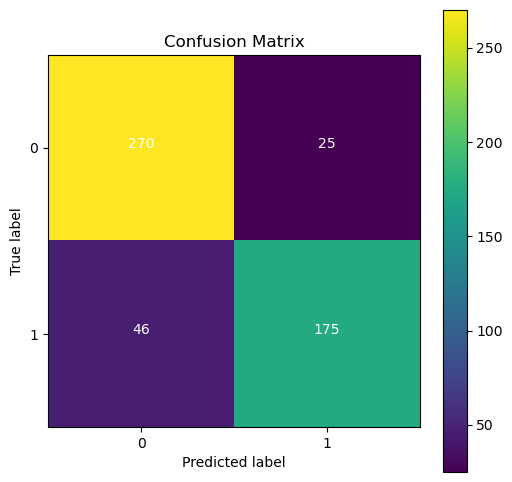

In [21]:
import itertools
# Calculate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Create a figure and axis object
fig, ax = plt.subplots(figsize=(6, 6))

# Plot the confusion matrix with a colorbar
im = ax.imshow(cm, interpolation='nearest', cmap='viridis')
fig.colorbar(im)

# Loop over the matrix and add text annotations
for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    ax.text(j, i,cm[i, j],
             horizontalalignment="center",
             color="white")

# Add axis labels
ax.set_xticks(range(2))
#ax.set_xticklabels(['True Positive', 'True Nagetive'])
ax.set_yticks(range(2))
#ax.set_yticklabels(['False Negative','False Positive'])

# Set the axis titles
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.title('Confusion Matrix')

# Display the plot
plt.show()

In [22]:
accuracy_score(y_test,y_pred)

0.8624031007751938

In [23]:
from sklearn.neighbors import KNeighborsClassifier

In [24]:
knn=KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_standard,y_train)

KNeighborsClassifier()

In [25]:
y_pred_1=knn.predict(X_test_standard)

In [26]:
accuracy_score(y_test,y_pred_1)

0.8798449612403101

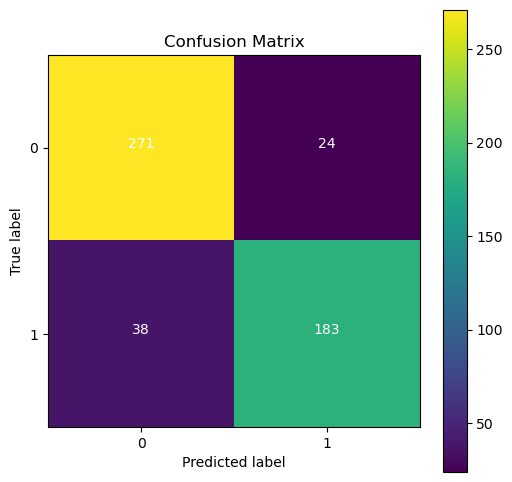

In [27]:
import itertools
# Calculate the confusion matrix
cm = confusion_matrix(y_test, y_pred_1)

# Create a figure and axis object
fig, ax = plt.subplots(figsize=(6, 6))


# Plot the confusion matrix with a colorbar
im = ax.imshow(cm, interpolation='nearest', cmap='viridis')
fig.colorbar(im)

# Loop over the matrix and add text annotations
for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    ax.text(j, i,cm[i, j],
             horizontalalignment="center",
             color="white")

# Add axis labels
ax.set_xticks(range(2))
#ax.set_xticklabels(['True Positive', 'True Nagetive'])
ax.set_yticks(range(2))
#ax.set_yticklabels(['False Negative','False Positive'])

# Set the axis titles
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.title('Confusion Matrix')
plt.show()

In [28]:
from sklearn.naive_bayes import GaussianNB
gnb=GaussianNB().fit(X_train_standard,y_train)

In [29]:
y_pred_2=gnb.predict(X_test_standard)

In [30]:
accuracy=gnb.score(X_test_standard,y_test)
accuracy

0.8817829457364341

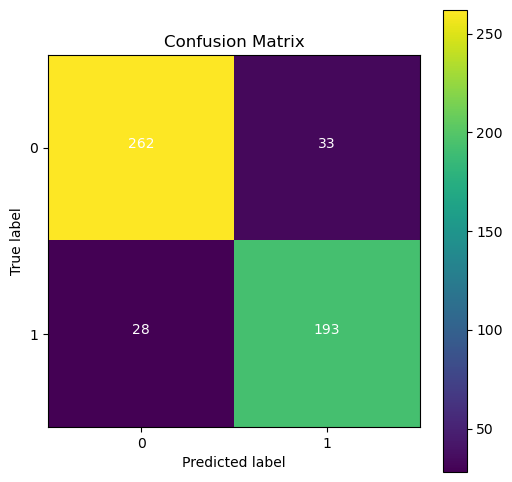

In [31]:
import itertools
# Calculate the confusion matrix
cm = confusion_matrix(y_test, y_pred_2)

# Create a figure and axis object
fig, ax = plt.subplots(figsize=(6, 6))


# Plot the confusion matrix with a colorbar
im = ax.imshow(cm, interpolation='nearest', cmap='viridis')
fig.colorbar(im)

# Loop over the matrix and add text annotations
for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    ax.text(j, i,cm[i, j],
             horizontalalignment="center",
             color="white")

# Add axis labels
ax.set_xticks(range(2))
#ax.set_xticklabels(['True Positive', 'True Nagetive'])
ax.set_yticks(range(2))
#ax.set_yticklabels(['False Negative','False Positive'])

# Set the axis titles
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.title('Confusion Matrix')
plt.show()

******Random Forest Classifier*****

In [32]:
from sklearn.ensemble import RandomForestClassifier

In [33]:
rf=RandomForestClassifier()
rf.fit(X_train_standard,y_train)

RandomForestClassifier()

In [34]:
y_pred_3=rf.predict(X_test_standard)

In [35]:
accuracy_score(y_test,y_pred_3)

0.872093023255814

Deep learning Approach

In [36]:
from sklearn.preprocessing import LabelEncoder

In [37]:
encoder = LabelEncoder()
encoder.fit(y_train)
encoded_Y = encoder.transform(y_train)

In [38]:
encoded_Y

array([1, 1, 1, ..., 1, 0, 0])

In [39]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import categorical_crossentropy

/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:98: UserWarning: unable to load libtensorflow_io_plugins.so: unable to open file: libtensorflow_io_plugins.so, from paths: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so']
caused by: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so: undefined symbol: _ZN3tsl6StatusC1EN10tensorflow5error4CodeESt17basic_string_viewIcSt11char_traitsIcEENS_14SourceLocationE']
  warnings.warn(f"unable to load libtensorflow_io_plugins.so: {e}")
/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:104: UserWarning: file system plugins are not loaded: unable to open file: libtensorflow_io.so, from paths: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io.so']
caused by: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io.so: undefined symbol: _ZTVN10tenso

In [40]:
model=Sequential()
model.add(Dense(units=16,input_shape=(16,),activation='relu',kernel_regularizer=tf.keras.regularizers.l2(0.001)))
model.add(Dense(units=32,activation='relu',kernel_regularizer=tf.keras.regularizers.l2(0.001)))
model.add(Dense(units=4,activation='softmax'))

In [41]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 16)                272       
                                                                 
 dense_1 (Dense)             (None, 32)                544       
                                                                 
 dense_2 (Dense)             (None, 4)                 132       
                                                                 
Total params: 948
Trainable params: 948
Non-trainable params: 0
_________________________________________________________________


In [42]:
model.compile(optimizer=Adam(learning_rate=0.1),loss='sparse_categorical_crossentropy',metrics=['Accuracy'])

In [43]:
history=model.fit(x=X_train_standard,y=encoded_Y,validation_split=0.2,batch_size=200,epochs=20,verbose=2)

Epoch 1/20
5/5 - 1s - loss: 0.7842 - Accuracy: 0.6930 - val_loss: 0.5428 - val_Accuracy: 0.8548 - 1s/epoch - 271ms/step
Epoch 2/20
5/5 - 0s - loss: 1.1538 - Accuracy: 0.7534 - val_loss: 0.7438 - val_Accuracy: 0.8299 - 46ms/epoch - 9ms/step
Epoch 3/20
5/5 - 0s - loss: 0.5495 - Accuracy: 0.8314 - val_loss: 0.5031 - val_Accuracy: 0.8589 - 50ms/epoch - 10ms/step
Epoch 4/20
5/5 - 0s - loss: 0.4476 - Accuracy: 0.8554 - val_loss: 0.4114 - val_Accuracy: 0.8714 - 49ms/epoch - 10ms/step
Epoch 5/20
5/5 - 0s - loss: 0.4171 - Accuracy: 0.8699 - val_loss: 0.4258 - val_Accuracy: 0.8672 - 47ms/epoch - 9ms/step
Epoch 6/20
5/5 - 0s - loss: 0.4126 - Accuracy: 0.8554 - val_loss: 0.4347 - val_Accuracy: 0.8589 - 44ms/epoch - 9ms/step
Epoch 7/20
5/5 - 0s - loss: 0.3962 - Accuracy: 0.8616 - val_loss: 0.4044 - val_Accuracy: 0.8672 - 64ms/epoch - 13ms/step
Epoch 8/20
5/5 - 0s - loss: 0.3907 - Accuracy: 0.8637 - val_loss: 0.3914 - val_Accuracy: 0.8797 - 48ms/epoch - 10ms/step
Epoch 9/20
5/5 - 0s - loss: 0.3779 -

In [44]:
import matplotlib.pyplot as plt

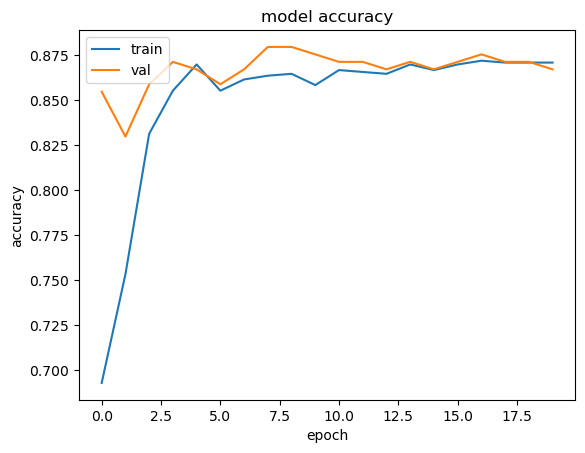

In [45]:
plt.plot(history.history['Accuracy'])
plt.plot(history.history['val_Accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

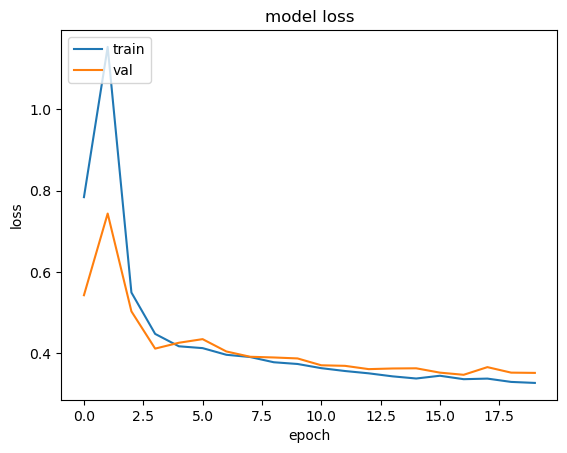

In [46]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()